In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_AN_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,3.815600,1.746400
1,-0.098505,NaN,2.062800,NaN,0.424720,1.17850,1.68020,1.38880,NaN,2.92360,0.772910,0.641450
2,-0.169460,0.50153,2.470900,3.06500,1.567600,1.48240,0.92160,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.787000,2.59570,2.89330,1.53750,0.99942,3.65930,0.618250,3.265800
4,0.098830,0.23418,0.429700,1.63120,3.554100,2.27110,0.37425,2.17860,1.31400,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.07470,0.80304,3.22290,3.49330,1.32550,3.231100,0.005387
796,3.466600,-4.03460,3.100400,1.34610,1.377300,2.28870,0.39613,2.39610,2.46350,1.66750,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,1.585300
798,NaN,-5.21630,1.577000,NaN,1.098700,NaN,0.81081,3.72700,1.18790,0.95112,1.884500,1.143700


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	52
float64		column 2	105
float64		column 3	0
float64		column 4	26
float64		column 5	0
float64		column 6	65
float64		column 7	26
float64		column 8	26
float64		column 9	39
float64		column 10	53
float64		column 11	53
float64		column 12	26


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,748.000000,695.000000,800.000000,774.000000,800.000000,735.000000,774.000000,774.000000,761.000000,747.000000,747.000000,774.000000
mean,1.532790,1.174122,1.981231,1.937614,1.989836,1.998894,1.960987,1.995013,1.984718,1.989998,1.951322,1.954459
std,2.760235,3.644195,1.146890,1.161937,1.169867,1.144163,1.165339,1.138374,1.146901,1.161764,1.178780,1.124701
min,-4.692600,-6.952900,0.020547,0.002628,0.021103,0.001674,0.005922,0.004193,0.009630,0.002830,0.002000,0.000288
25%,-0.441075,-1.883650,1.020375,0.929173,0.976290,0.984420,0.957522,0.981097,1.055800,0.986200,0.903755,0.961058
50%,1.100050,0.488590,1.968150,1.902350,2.027350,1.998000,1.960500,1.997900,1.960000,2.014600,1.911600,1.950200
75%,4.004750,4.443750,2.925475,2.942525,2.999200,3.025300,2.987475,2.930300,3.005100,2.992350,2.996750,2.864325
max,6.982200,8.018800,3.992600,3.997300,3.998500,3.997500,3.999900,3.998200,3.996200,3.998800,3.990900,3.998300


<AxesSubplot:>

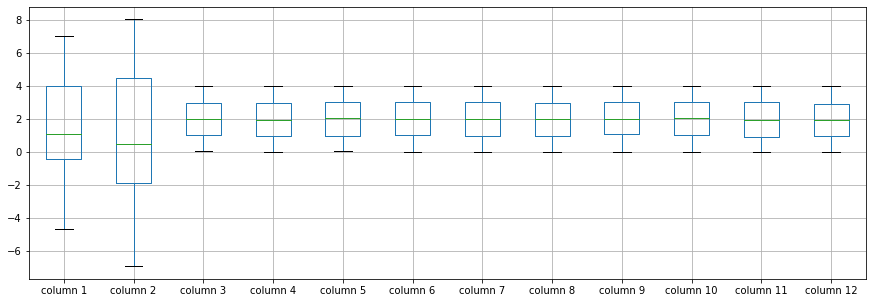

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.532790
column 2     1.174122
column 3     1.981231
column 4     1.937614
column 5     1.989836
column 6     1.998894
column 7     1.960987
column 8     1.995013
column 9     1.984718
column 10    1.989998
column 11    1.951322
column 12    1.954459
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.415465,-0.016462,-0.003960,0.059352,0.059471,0.010461,0.035170,0.001459,0.001198,0.012219,0.027243
column 2,-0.415465,1.000000,-0.017765,0.013262,0.007286,-0.010177,0.042436,-0.004258,0.003586,-0.032257,-0.083104,0.022732
column 3,-0.016462,-0.017765,1.000000,-0.032478,0.078727,-0.009496,0.029740,0.007531,-0.006034,-0.009489,-0.033701,0.010465
column 4,-0.003960,0.013262,-0.032478,1.000000,0.007099,-0.058785,0.049944,0.048638,-0.025308,0.051083,0.045494,-0.024621
column 5,0.059352,0.007286,0.078727,0.007099,1.000000,0.049194,0.034795,0.006861,-0.030607,-0.021715,-0.008813,0.003359
column 6,0.059471,-0.010177,-0.009496,-0.058785,0.049194,1.000000,-0.053145,0.012065,0.023553,0.012153,-0.018019,0.009349
column 7,0.010461,0.042436,0.029740,0.049944,0.034795,-0.053145,1.000000,-0.041713,0.002239,-0.042358,0.002154,-0.009702
column 8,0.035170,-0.004258,0.007531,0.048638,0.006861,0.012065,-0.041713,1.000000,-0.073741,-0.058586,0.011832,-0.035452
column 9,0.001459,0.003586,-0.006034,-0.025308,-0.030607,0.023553,0.002239,-0.073741,1.000000,0.049087,-0.015177,-0.006251
column 10,0.001198,-0.032257,-0.009489,0.051083,-0.021715,0.012153,-0.042358,-0.058586,0.049087,1.000000,-0.071551,0.047640


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+50,12+50+50,12+50+50,12+50+50+50+50,12+50+50+50,12+50+50,12+50,12], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 27.965332679748535
Epoch: 1 , loss: 27.737710075378416
Epoch: 2 , loss: 27.11731300354004
Epoch: 3 , loss: 24.043774909973145
Epoch: 4 , loss: 22.19956531524658
Epoch: 5 , loss: 21.598386116027832
Epoch: 6 , loss: 21.098874130249023
Epoch: 7 , loss: 20.86957939147949
Epoch: 8 , loss: 20.464991722106934
Epoch: 9 , loss: 20.071378707885742
Epoch: 10 , loss: 19.87142692565918
Epoch: 11 , loss: 19.709406814575196
Epoch: 12 , loss: 19.62650863647461
Epoch: 13 , loss: 19.642127799987794
Epoch: 14 , loss: 19.185681457519532
Epoch: 15 , loss: 19.195012283325195
Epoch: 16 , loss: 19.144624671936036
Epoch: 17 , loss: 19.18272415161133
Epoch: 18 , loss: 18.96200481414795
Epoch: 19 , loss: 18.94466293334961
Epoch: 20 , loss: 18.818088512420655
Epoch: 21 , loss: 18.848019371032716
Epoch: 22 , loss: 18.782672500610353
Epoch: 23 , loss: 18.880590667724608
Epoch: 24 , loss: 18.71953411102295
Epoch: 25 , loss: 18.65978

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.042845
column 3     3.034900
column 4     0.379700
column 5     2.475300
column 6     2.162000
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    3.847400
column 11    0.230250
column 12    0.359250
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.000000,0.755407,0.0,-1.881265,0.0,0.000000,0.0,0.0,-2.130788,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
796,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
797,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
798,-2.975948,0.000000,0.0,-1.172643,0.0,-2.752783,0.0,0.0,0.000000,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(49.259294116927734, 248.22200824735242)

In [17]:
NRMS=numerator/denominator
NRMS


0.19844853590839137

In [18]:
new_df.iloc[66,:]

column 1     0.20762
column 2    -0.55052
column 3     2.33990
column 4     1.79480
column 5     1.40130
column 6     2.76580
column 7     1.30410
column 8     1.24930
column 9     1.05940
column 10    1.28430
column 11    1.87940
column 12    0.57524
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.161340,0.067351,3.533700,0.469590,0.679080,3.43440,2.79240,2.776300,1.69910,3.815600,1.746400
1,-0.098505,0.576837,2.062800,1.040335,0.424720,1.178500,1.68020,1.38880,1.085912,2.92360,0.772910,0.641450
2,-0.169460,0.501530,2.470900,3.065000,1.567600,1.482400,0.92160,2.64240,1.518700,2.53180,2.432800,1.876800
3,-0.136050,0.472790,0.588090,1.956300,2.787000,2.595700,2.89330,1.53750,0.999420,3.65930,0.618250,3.265800
4,0.098830,0.234180,0.429700,1.631200,3.554100,2.271100,0.37425,2.17860,1.314000,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.686700,1.576000,0.556120,0.070769,2.074700,0.80304,3.22290,3.493300,1.32550,3.231100,0.005387
796,3.466600,-4.034600,3.100400,1.346100,1.377300,2.288700,0.39613,2.39610,2.463500,1.66750,2.461700,1.226700
797,3.344800,-2.384300,2.031000,2.264600,3.341200,1.537000,1.22560,0.74027,2.495400,1.34330,1.622500,1.585300
798,0.465452,-5.216300,1.577000,0.671357,1.098700,0.671517,0.81081,3.72700,1.187900,0.95112,1.884500,1.143700


In [20]:
imputations[-1].to_excel("4-gauss_AN_5(imp).xlsx", index=False, header=False)